# Liver Patient Prediction

### About Data:

* "0" --> non-liver patient
* "1" --> liver patient

In [1]:
#importing zipfile library to unzip the zip
#import zipfile

In [2]:
# reading the zip file to a variable zip_file
#zip_file=zipfile.ZipFile('LiverPatientPred.zip','r')

In [3]:
#extracting all the zip 
#zip_file.extractall('LiverPatientPred_Extracted')

In [4]:
# checking the files inside the zip
#zip_file.namelist()

In [5]:
# Including libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [6]:
# Coloumn names
column_names=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase',
             'Aspartate_Aminotransferase','Total_Proteins',
             'Albumin','Albumin_and_Globulin_Ratio','Liver_Disease']

In [7]:
# Load dataset
df=pd.read_csv("LiverPatientPred_Extracted/Data/Indian Liver Patient Dataset (ILPD).csv",names=column_names)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
#The Liver_Disease contains 1 and 2 valuse, 1 - Represents liver patients and 2 - Represents non-liver patients
df.Liver_Disease.value_counts()

1    416
2    167
Name: Liver_Disease, dtype: int64

In [9]:
# Changing values of Liver_Disease attribute we replace 2 with 0 for more understading.
df["Liver_Disease"].replace({2: 0}, inplace=True)
df.Liver_Disease.value_counts()

1    416
0    167
Name: Liver_Disease, dtype: int64

In [10]:
# Checking shape of a dataset
df.shape

(583, 11)

In [11]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Liver_Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


From above output we have four null values in Albumin_and_Globulin_Ratio 

### Dealing with missing values

In [12]:
# Checkig null values count 
df.isnull().sum().sum()

4

Now replacing null values with mean of that column.

In [13]:
df = df.fillna(df.mean())

In [14]:
# Checkig null values count 
df.isnull().sum().sum()

0

In [15]:
# Summary of statistics pertaining to the DataFrame columns
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [16]:
# list out numerical and categorical varaibles separately
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [17]:
numerical_features.shape

(10,)

In [18]:
categorical_features

Index(['Gender'], dtype='object')

In [19]:
# list out discrete and continous varaibles from numerical varaibles separately
discrete_var = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete varaibles count: {}".format(len(discrete_var)),discrete_var)

Discrete varaibles count: 1 ['Liver_Disease']


In [20]:
discrete_var

['Liver_Disease']

In [21]:
contionus_var = [feature for feature in numerical_features if feature not in discrete_var]
print("Contionous varaibles count: {}".format(len(contionus_var)),contionus_var)

Contionous varaibles count: 9 ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio']


In [22]:
contionus_var

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Proteins',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

### Exploring data visuvally

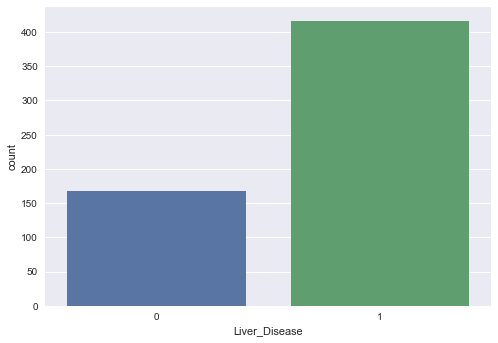

In [23]:
# it is a plot it represents a count of liver and non-liver patients.
ax = sns.countplot(x="Liver_Disease", data=df)

Text(0.5, 1.0, 'Proportion of Patients')

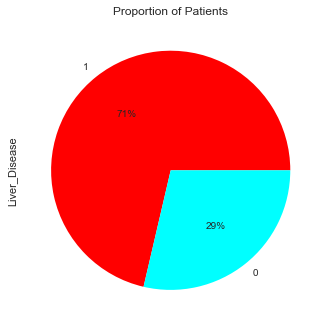

In [24]:
#visualizing the number of Liver Disease Patients and Non-Liver Disease Patient
colors = ['red','cyan']
df.Liver_Disease.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Patients')

## 1 - Liver Disease - 71%
## 2 - Non-Liver Disease - 29%

Text(0.5, 1.0, 'Proportion of Patients')

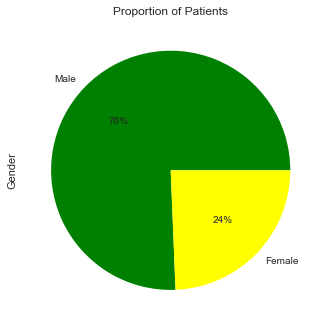

In [25]:
#visualizing the Gender counts
colors = ['green','yellow']
df.Gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Patients')

## Male - 76%
## Female - 24%

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total_Bilirubin'}>,
        <AxesSubplot:title={'center':'Direct_Bilirubin'}>,
        <AxesSubplot:title={'center':'Alkaline_Phosphotase'}>],
       [<AxesSubplot:title={'center':'Alamine_Aminotransferase'}>,
        <AxesSubplot:title={'center':'Aspartate_Aminotransferase'}>,
        <AxesSubplot:title={'center':'Total_Proteins'}>,
        <AxesSubplot:title={'center':'Albumin'}>],
       [<AxesSubplot:title={'center':'Albumin_and_Globulin_Ratio'}>,
        <AxesSubplot:title={'center':'Liver_Disease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

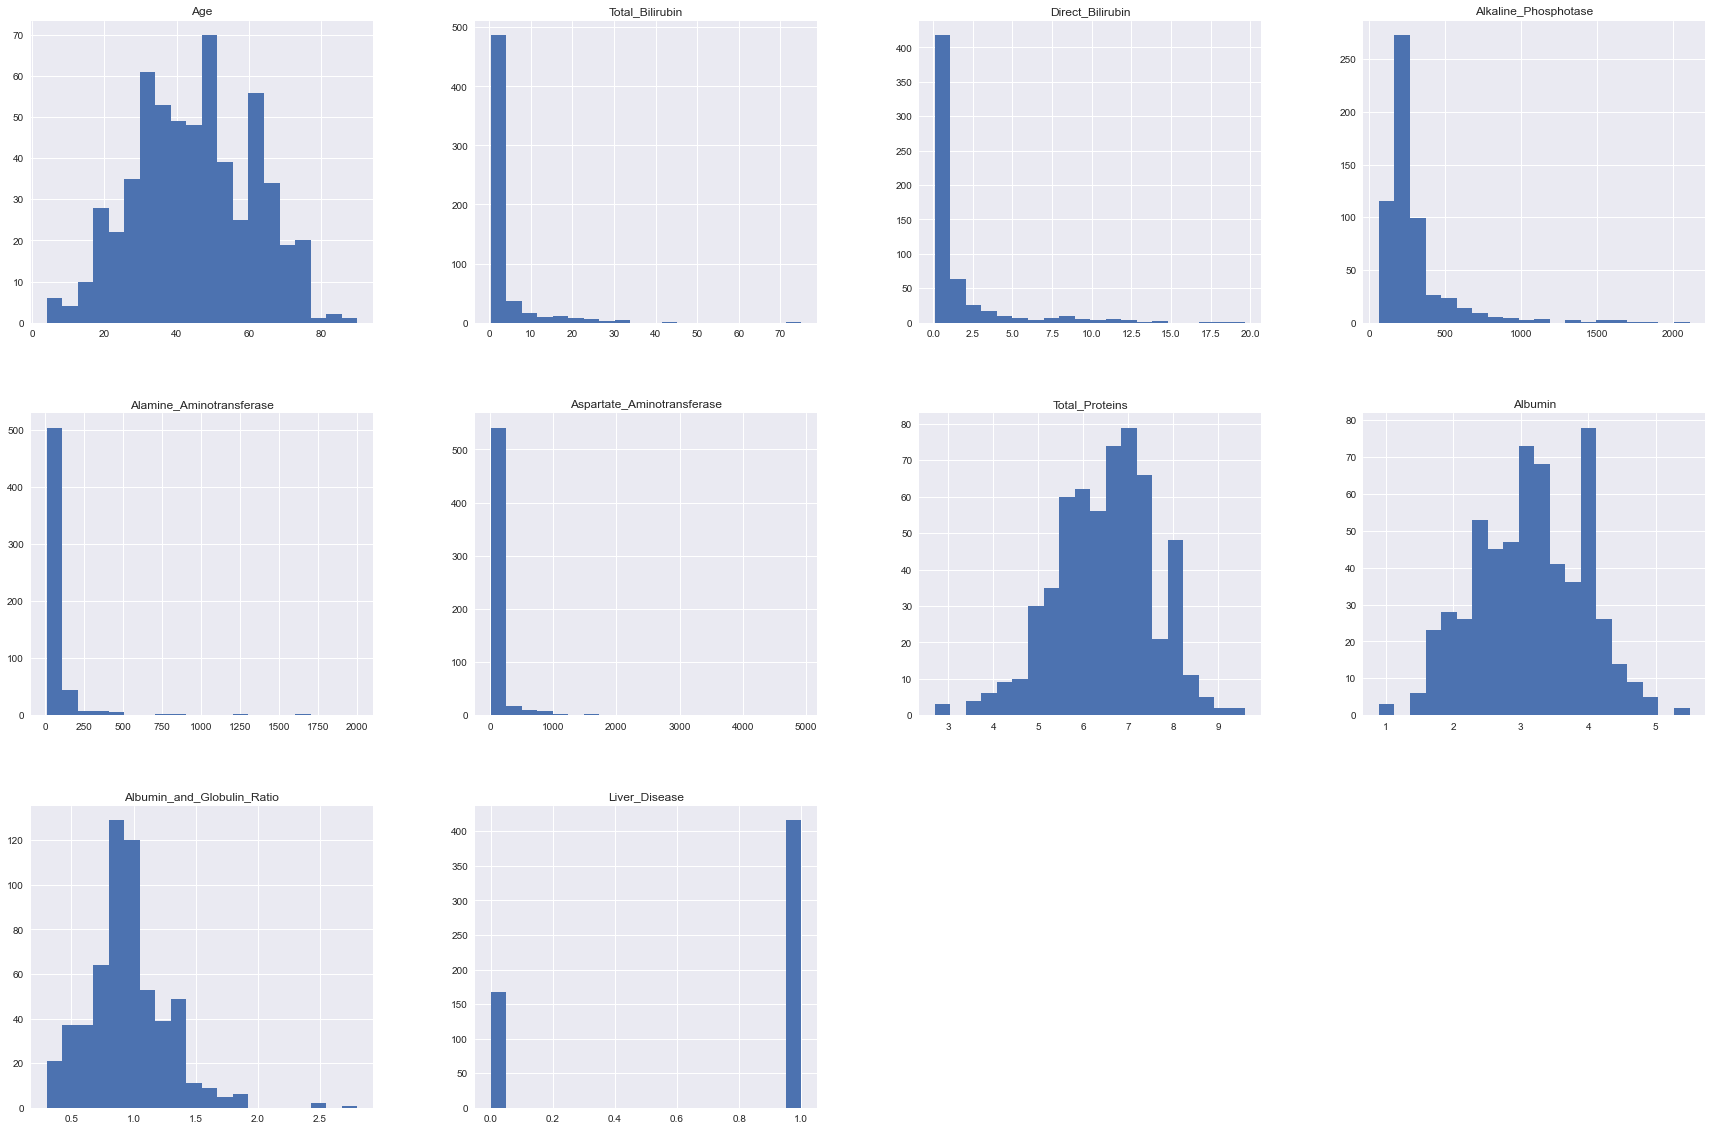

In [26]:
# To check wheather data is normally distributed or not.

df.hist(figsize=(30,20), grid=True, layout=(3, 4), bins = 20)

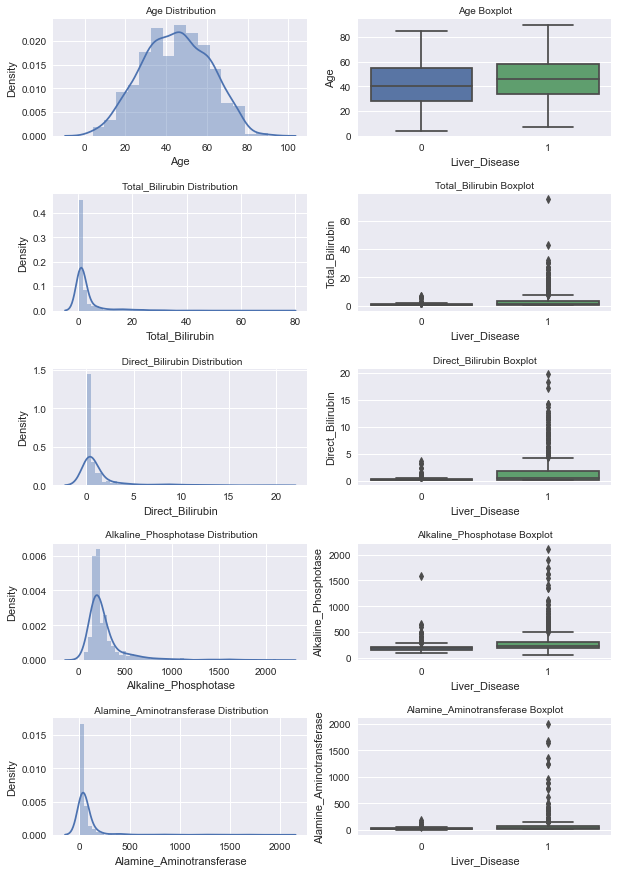

In [27]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10, 15)
a = sns.distplot(df['Age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(df.Liver_Disease, df['Age'] , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=10)

a = sns.distplot(df['Total_Bilirubin'] , ax=axes[1][0])
a.set_title("Total_Bilirubin Distribution",fontsize=10)

a = sns.boxplot(df.Liver_Disease, df['Total_Bilirubin'] , ax=axes[1][1])
a.set_title("Total_Bilirubin Boxplot",fontsize=10)

a = sns.distplot(df['Direct_Bilirubin'] , ax=axes[2][0])
a.set_title(" Direct_Bilirubin Distribution",fontsize=10)

a = sns.boxplot(df.Liver_Disease, df['Direct_Bilirubin'] , ax=axes[2][1])
a.set_title("Direct_Bilirubin Boxplot",fontsize=10)

a = sns.distplot(df['Alkaline_Phosphotase'] , ax=axes[3][0])
a.set_title(" Alkaline_Phosphotase Distribution",fontsize=10)

a = sns.boxplot(df.Liver_Disease, df['Alkaline_Phosphotase'] , ax=axes[3][1])
a.set_title("Alkaline_Phosphotase Boxplot",fontsize=10)

a = sns.distplot(df['Alamine_Aminotransferase'] , ax=axes[4][0])
a.set_title(" Alamine_Aminotransferase Distribution",fontsize=10)

a = sns.boxplot(df.Liver_Disease, df['Alamine_Aminotransferase'] , ax=axes[4][1])
a.set_title("Alamine_Aminotransferase Boxplot",fontsize=10)

sns.despine(left = True, bottom = True)
plt.subplots_adjust(hspace = 0.5)
plt.show()


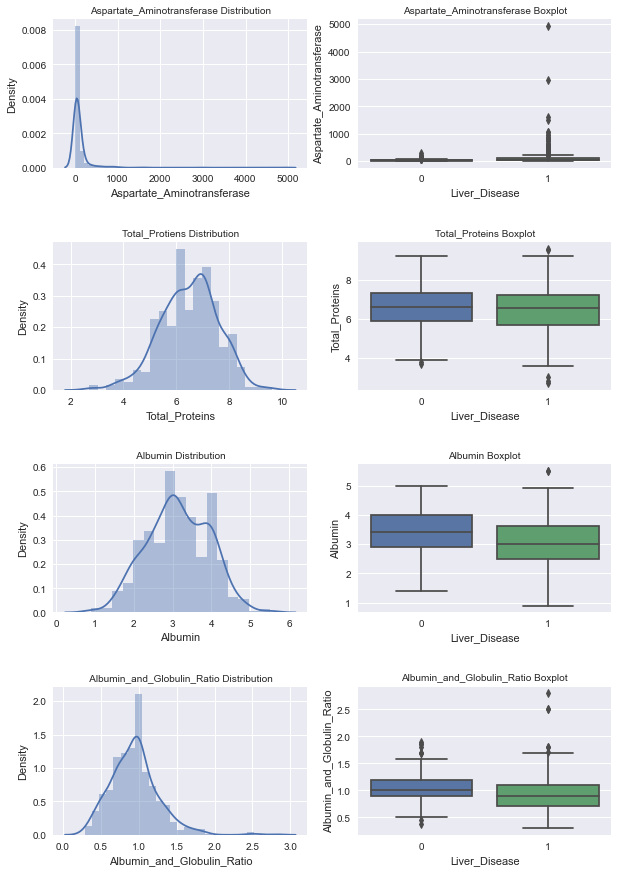

In [28]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10, 15)
a = sns.distplot(df['Aspartate_Aminotransferase'] , ax=axes[0][0])
a.set_title("Aspartate_Aminotransferase Distribution",fontsize=10)

a = sns.boxplot(df.Liver_Disease, df['Aspartate_Aminotransferase'] , ax=axes[0][1])
a.set_title("Aspartate_Aminotransferase Boxplot",fontsize=10)

a = sns.distplot(df['Total_Proteins'] , ax=axes[1][0])
a.set_title("Total_Protiens Distribution",fontsize=10)

a = sns.boxplot(df.Liver_Disease, df['Total_Proteins'] , ax=axes[1][1])
a.set_title("Total_Proteins Boxplot",fontsize=10)

a = sns.distplot(df['Albumin'] , ax=axes[2][0])
a.set_title(" Albumin Distribution",fontsize=10)

a = sns.boxplot(df.Liver_Disease, df['Albumin'] , ax=axes[2][1])
a.set_title("Albumin Boxplot",fontsize=10)

a = sns.distplot(df['Albumin_and_Globulin_Ratio'] , ax=axes[3][0])
a.set_title(" Albumin_and_Globulin_Ratio Distribution",fontsize=10)

a = sns.boxplot(df.Liver_Disease, df['Albumin_and_Globulin_Ratio'] , ax=axes[3][1])
a.set_title("Albumin_and_Globulin_Ratio Boxplot",fontsize=10)

sns.despine(left = True, bottom = True)
plt.subplots_adjust(hspace = 0.5)
plt.show()


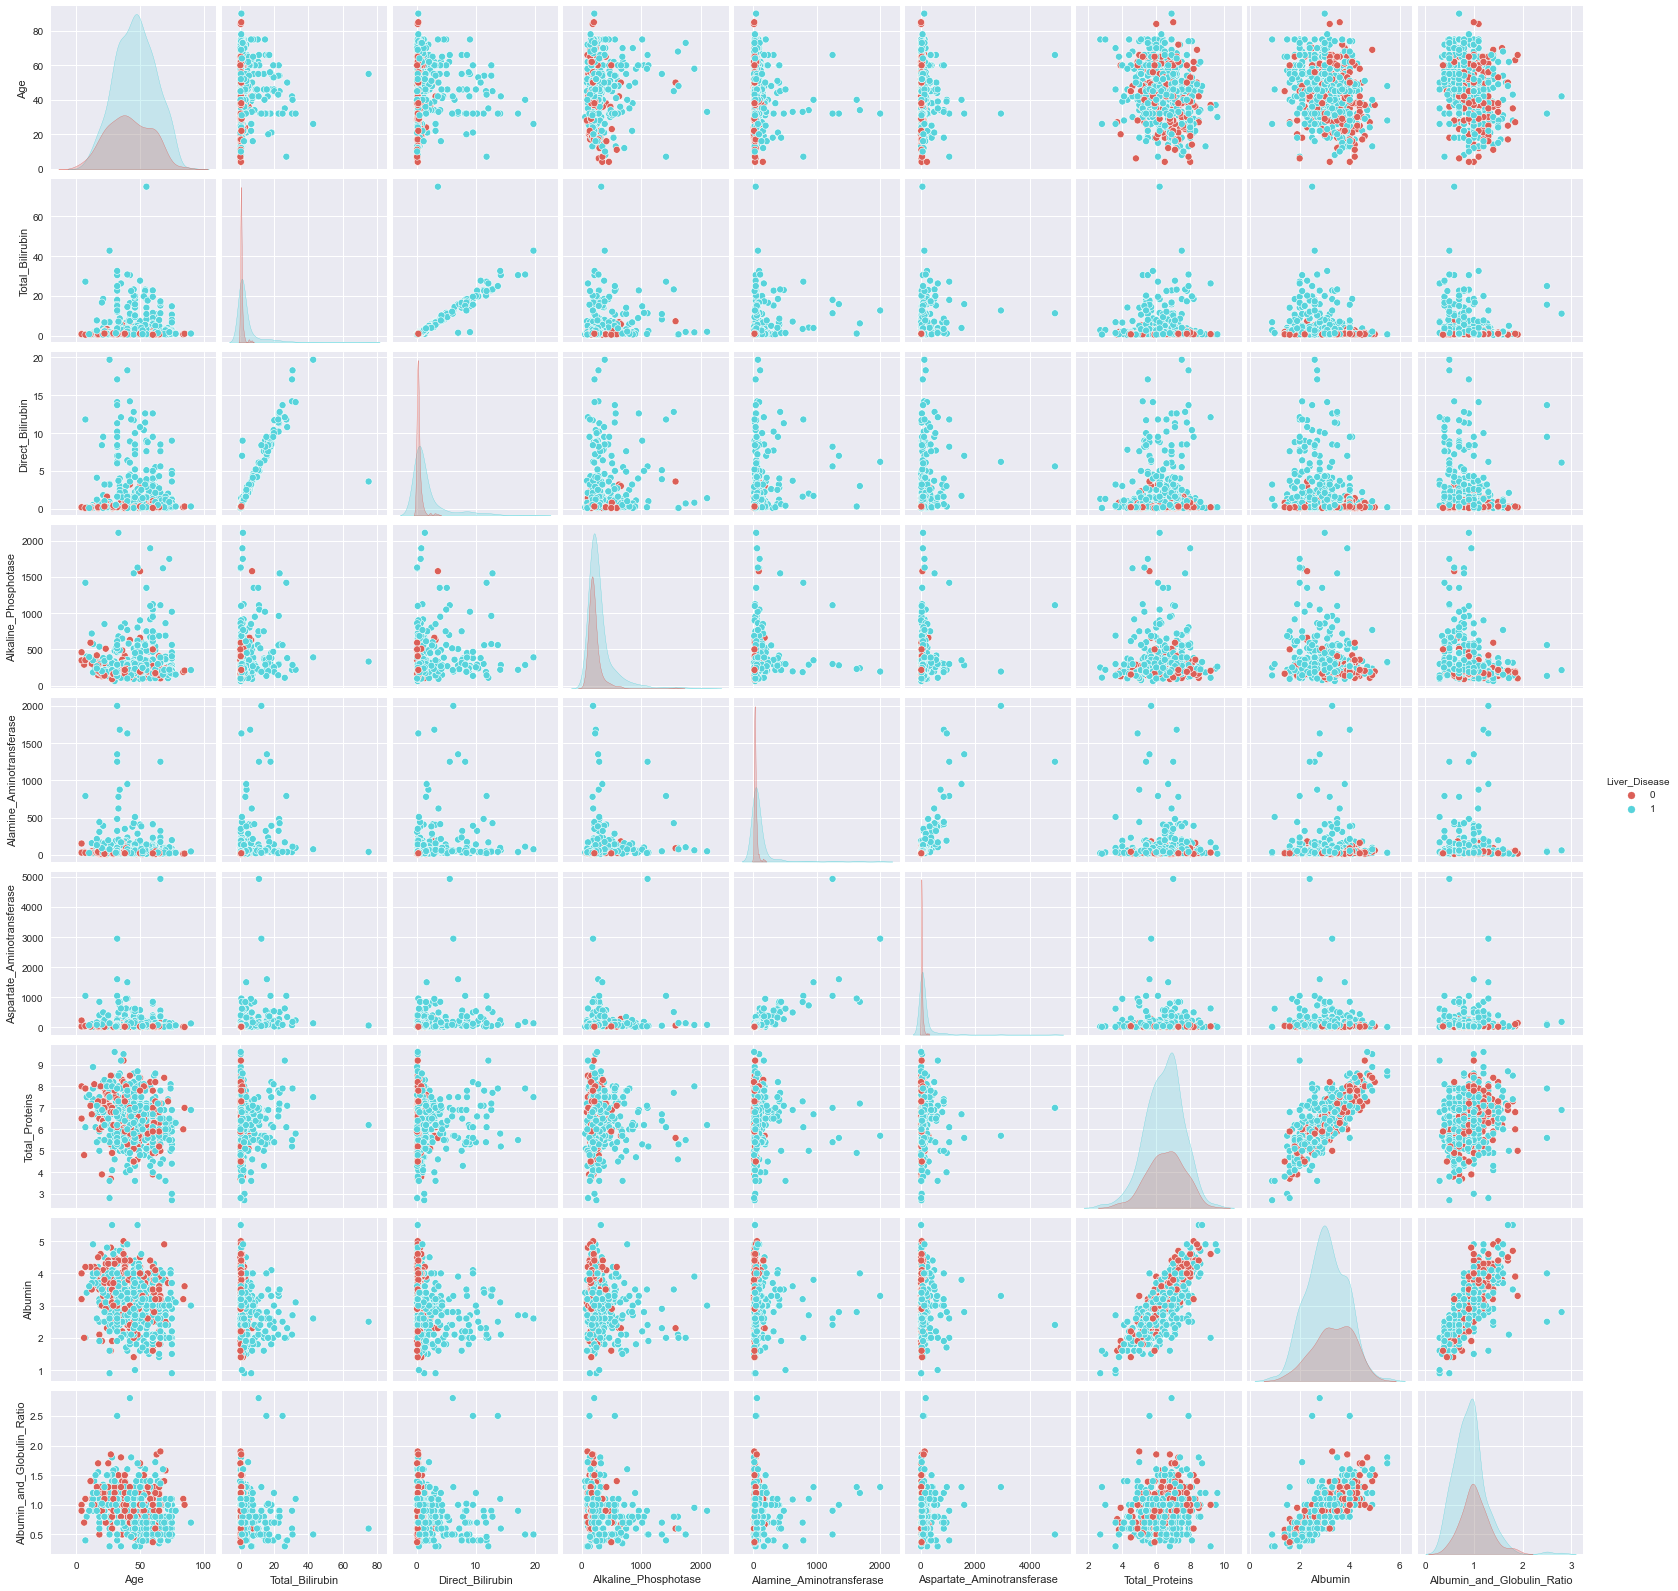

In [29]:
# checking for data relation to Liver Disease using pair plot
# Red color - Non Liver Patient
# Turquoise color - Liver Patient
sns.pairplot(df[numerical_features], hue = 'Liver_Disease',diag_kind = "kde",kind = "scatter",palette = "hls")

In [30]:
# checking the skew values of numerical features
skew_values = skew(df[numerical_features], nan_policy = 'omit')

dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
5,Aspartate_Aminotransferase,10.519024
4,Alamine_Aminotransferase,6.532329
1,Total_Bilirubin,4.894839
3,Alkaline_Phosphotase,3.755412
2,Direct_Bilirubin,3.204132
8,Albumin_and_Globulin_Ratio,0.993140
0,Age,-0.029310
7,Albumin,-0.043572
6,Total_Proteins,-0.284937
9,Liver_Disease,-0.944701


In [31]:
# checking the kurtosis values of numerical features
kurtosis_value =kurtosis(df[numerical_features])
dummy_k = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']),
                   pd.DataFrame(list(kurtosis_value), columns=['Kurtosis Degree'])], axis=1)
dummy_k.sort_values(by ='Kurtosis Degree', ascending=False)

,Features,Kurtosis Degree
5,Aspartate_Aminotransferase,149.618375
4,Alamine_Aminotransferase,50.136430
1,Total_Bilirubin,36.835553
3,Alkaline_Phosphotase,17.590666
2,Direct_Bilirubin,11.245125
8,Albumin_and_Globulin_Ratio,3.286414
6,Total_Proteins,0.220771
7,Albumin,-0.394860
0,Age,-0.565548
9,Liver_Disease,-1.107540


From above some features are not normally distributed. to remove high skewness and kurtosis we apply log transformtion to get normalized data for below features

In [32]:
# Applying log transformation
df['Aspartate_Aminotransferase'] = np.log(df['Aspartate_Aminotransferase'])
df['Alamine_Aminotransferase'] = np.log(df['Alamine_Aminotransferase'])
df['Total_Bilirubin'] = np.log(df['Total_Bilirubin'])
df['Alkaline_Phosphotase'] = np.log(df['Alkaline_Phosphotase'])
df['Direct_Bilirubin'] = np.log(df['Direct_Bilirubin'])

In [33]:
# Checking again skewness after applying log transformation.
skew_values = skew(df[numerical_features], nan_policy = 'omit')

dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
4,Alamine_Aminotransferase,1.421960
3,Alkaline_Phosphotase,1.321357
1,Total_Bilirubin,1.315100
5,Aspartate_Aminotransferase,1.191822
8,Albumin_and_Globulin_Ratio,0.993140
2,Direct_Bilirubin,0.829050
0,Age,-0.029310
7,Albumin,-0.043572
6,Total_Proteins,-0.284937
9,Liver_Disease,-0.944701


In [34]:
# Checking again kurtosis after applying log transformation.
kurtosis_value =kurtosis(df[numerical_features])
dummy_k = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']),
                   pd.DataFrame(list(kurtosis_value), columns=['Kurtosis Degree'])], axis=1)
dummy_k.sort_values(by ='Kurtosis Degree', ascending=False)

,Features,Kurtosis Degree
8,Albumin_and_Globulin_Ratio,3.286414
4,Alamine_Aminotransferase,2.597219
3,Alkaline_Phosphotase,2.248406
5,Aspartate_Aminotransferase,1.575717
1,Total_Bilirubin,0.903193
6,Total_Proteins,0.220771
2,Direct_Bilirubin,-0.289770
7,Albumin,-0.394860
0,Age,-0.565548
9,Liver_Disease,-1.107540


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total_Bilirubin'}>,
        <AxesSubplot:title={'center':'Direct_Bilirubin'}>,
        <AxesSubplot:title={'center':'Alkaline_Phosphotase'}>],
       [<AxesSubplot:title={'center':'Alamine_Aminotransferase'}>,
        <AxesSubplot:title={'center':'Aspartate_Aminotransferase'}>,
        <AxesSubplot:title={'center':'Total_Proteins'}>,
        <AxesSubplot:title={'center':'Albumin'}>],
       [<AxesSubplot:title={'center':'Albumin_and_Globulin_Ratio'}>,
        <AxesSubplot:title={'center':'Liver_Disease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

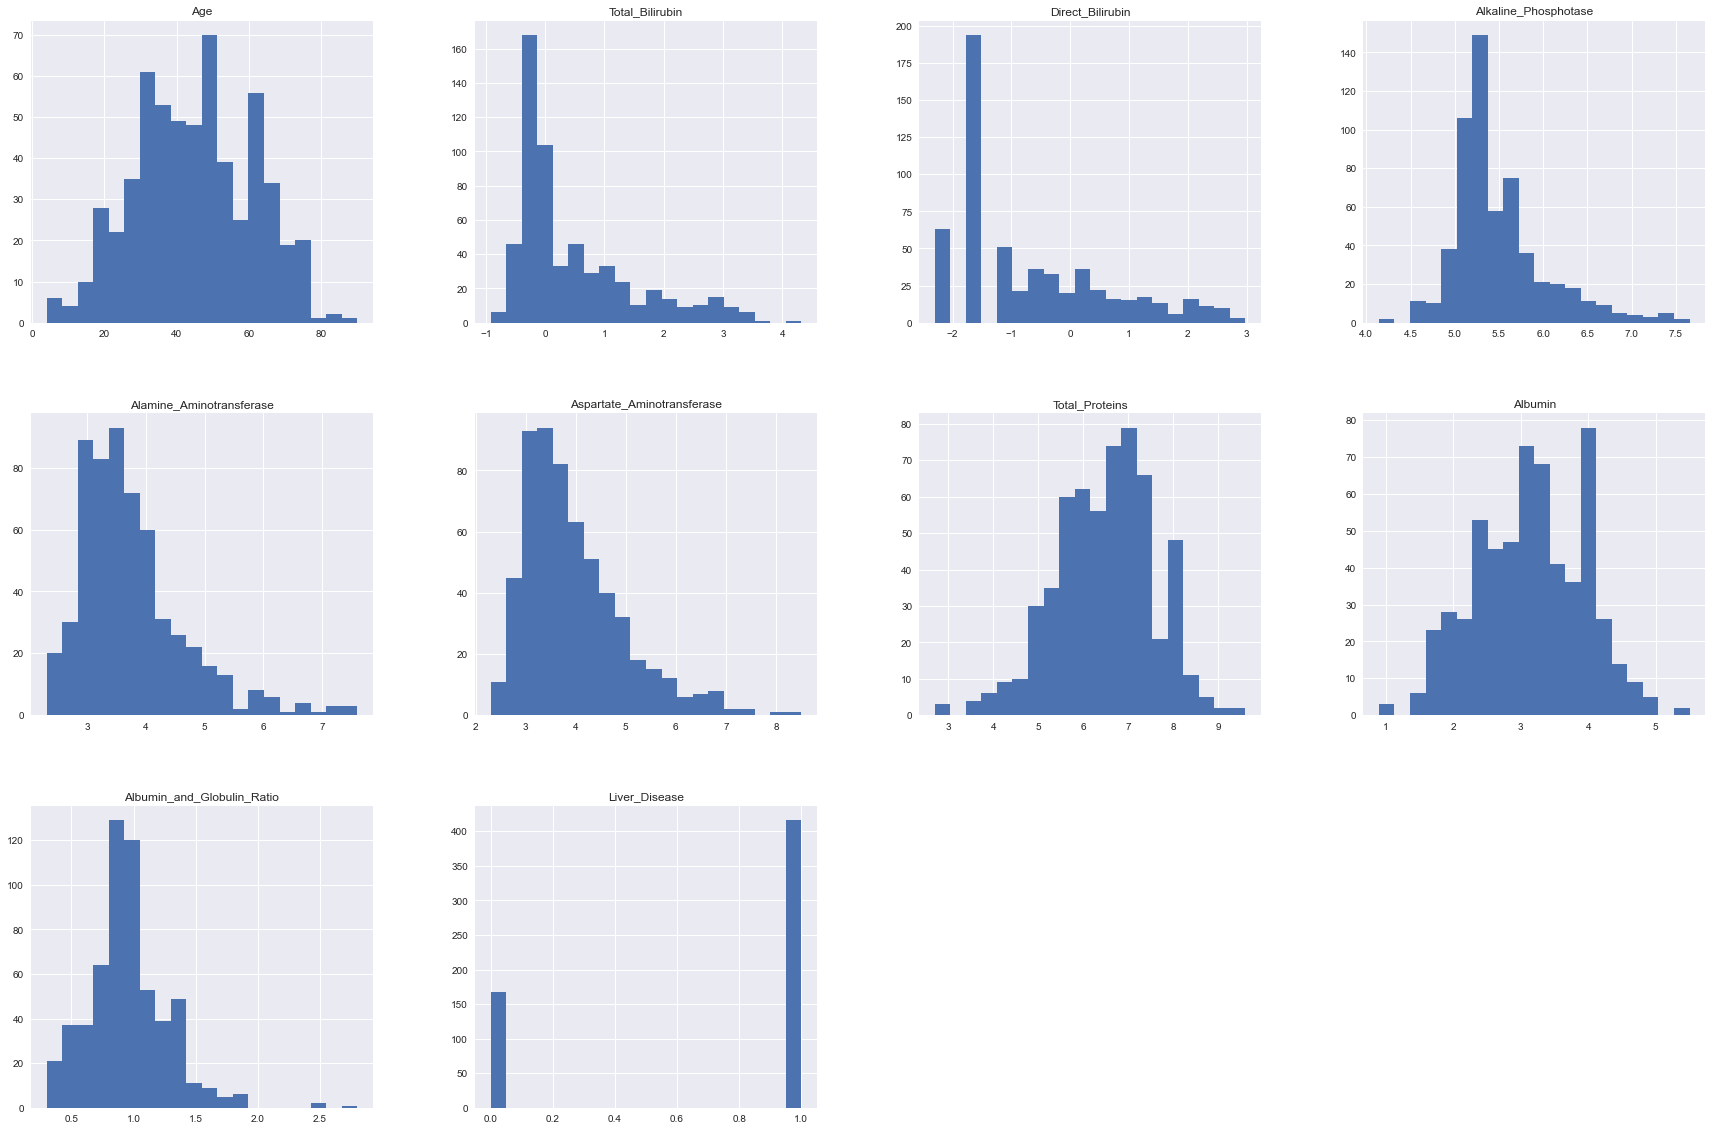

In [35]:
# histograms
df.hist(figsize=(30,20), grid=True, layout=(3, 4), bins = 20)

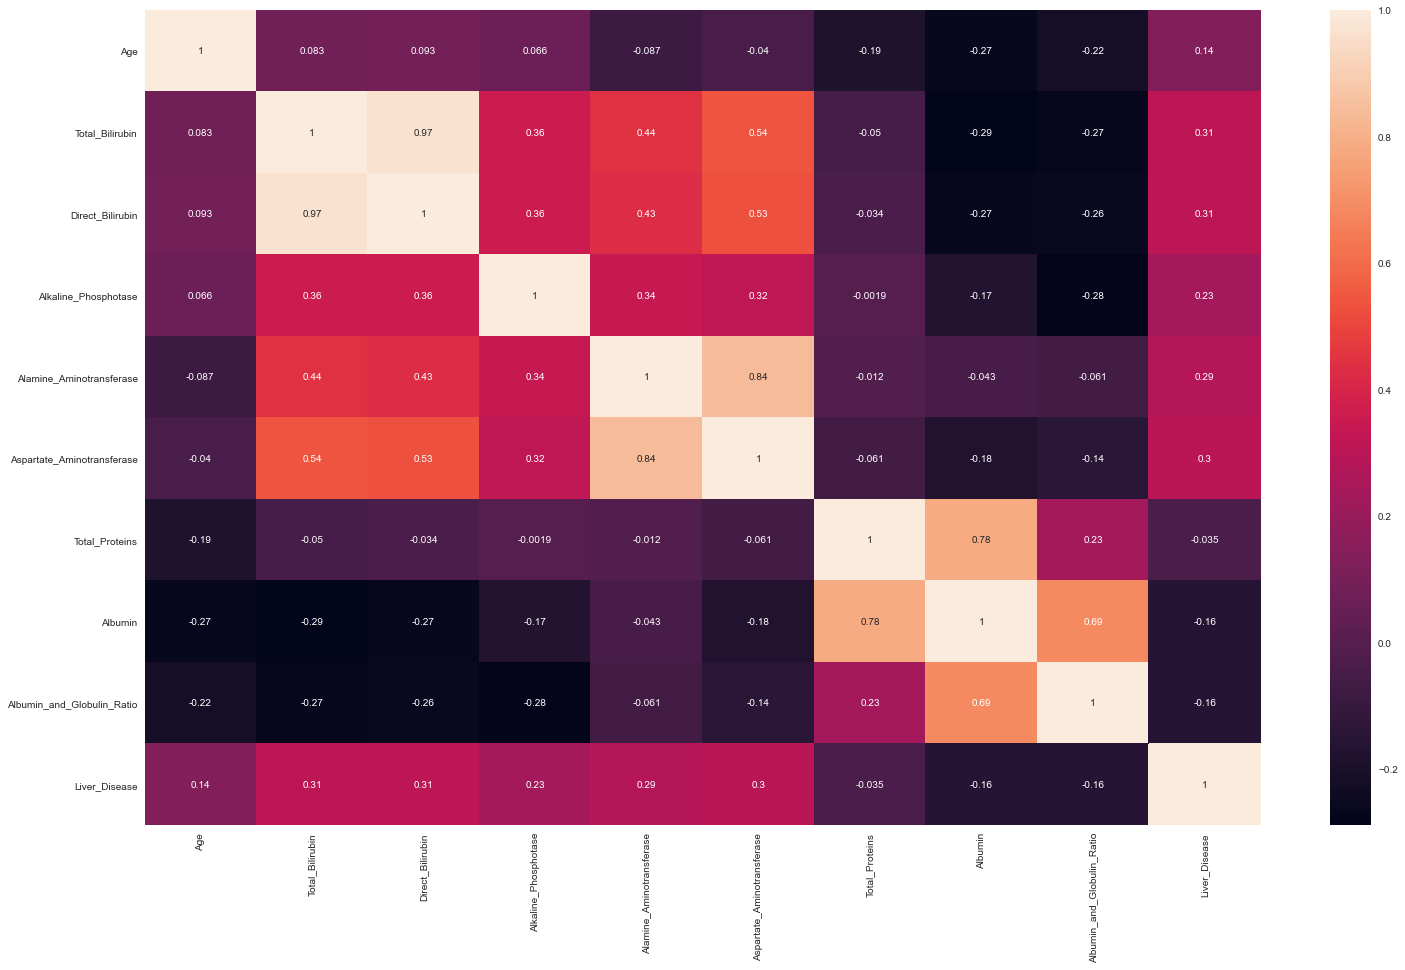

In [36]:
# plotting heat map

plt.figure(figsize =(25,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

From above we see the negative correlation in Total_Protiens,Albumin and Albumin_and_Globulin_Ratio,so we remove the negative correlation features among them.
From above we see the highest correlation between Total_Bilirubin,Direct_Bilirubin and Alamine_Aminotransferase,Aspartate_Aminotransferase
so we remove one of the feature among them.

In [37]:
# drop 2 columns we find direct relationship between the following tot_bilirubin and sgotAspartate
data = df.drop(['Total_Proteins', 'Albumin','Albumin_and_Globulin_Ratio', 'Aspartate_Aminotransferase'], axis = 1)

In [38]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Liver_Disease
0,65,Female,-0.356675,-2.302585,5.231109,2.772589,1
1,62,Male,2.388763,1.704748,6.549651,4.158883,1
2,62,Male,1.987874,1.410987,6.194405,4.094345,1
3,58,Male,0.000000,-0.916291,5.204007,2.639057,1
4,72,Male,1.360977,0.693147,5.273000,3.295837,1


In [39]:
features = data.select_dtypes(include=[np.number]).columns

### Machine learing Approach

In [40]:
# Now independent(predictor) varaibles are assigned to X and dependent(target) varaible assigned to y.

X=data.iloc[:,:-1]
y=data['Liver_Disease']

In [41]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X.Gender = le.fit_transform(X.Gender)

In [42]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X=scaling.fit_transform(X)

In [43]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=8)

In [44]:
y_train.value_counts()

1    306
0    131
Name: Liver_Disease, dtype: int64

In [45]:
y_test.shape

(146,)

In [46]:
# To balance a datset
from imblearn.over_sampling import SMOTE
smote =SMOTE()

In [47]:
X_train_smote,y_train_smote = smote.fit_sample(X_train,y_train)

In [48]:
y_train_smote.value_counts()

1    306
0    306
Name: Liver_Disease, dtype: int64

In [49]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [50]:
def performance_matrices(model, X_data, y_data, y_predicted): 
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of MAJORITY class
    precision=round(met_df.loc["1"][0],2)
    recall=round(met_df.loc["1"][1],2)
    f1=round(met_df.loc["1"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [51]:
def draw_auc_roc_1(model, X_data, y_data, line_color, title):
    probs = model.predict(X_data)
    #probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

In [52]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [54]:
ypredictlr = lr.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, ypredictlr)

0.7123287671232876

In [56]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
confusion_matrix(y_test,ypredictlr)

array([[10, 26],
       [16, 94]], dtype=int64)

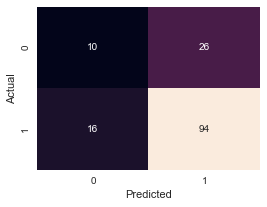

In [57]:
confusion_matrix = pd.crosstab(y_test,ypredictlr, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False)
plt.show()

In [58]:
lr_report=classification_report(y_test,ypredictlr)
print(lr_report)

              precision    recall  f1-score   support

           0       0.38      0.28      0.32        36
           1       0.78      0.85      0.82       110

    accuracy                           0.71       146
   macro avg       0.58      0.57      0.57       146
weighted avg       0.69      0.71      0.70       146



In [59]:
lr_met,lr_test_accu,lr_test_precision,lr_test_recall,lr_test_f1 = performance_matrices(lr, X_test, y_test, ypredictlr)
print ('Logistic_test_accu ',lr_test_accu)
print ('Logistic_test_precision ',lr_test_precision)
print ('Logistic_test_recall ',lr_test_recall)
print ('Logistic_test_f1 ',lr_test_f1)

Logistic_test_accu  0.71
Logistic_test_precision  0.78
Logistic_test_recall  0.85
Logistic_test_f1  0.82


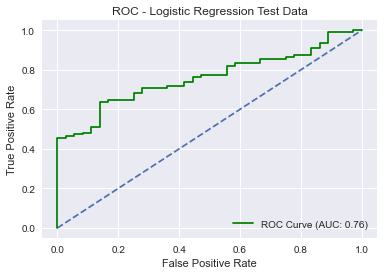

logistic_test_auc 0.76


In [60]:
lr_test_auc, lr_test_fpr, lr_test_tpr = draw_auc_roc(lr, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logistic_test_auc', round(lr_test_auc,2))

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=120,
                             max_depth=25,
                             random_state=25
                            )
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=25, n_estimators=120, random_state=25)

In [62]:
ypredictrfc = rfc.predict(X_test)

In [63]:
accuracy_score(y_test,ypredictrfc)

0.7397260273972602

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictrfc)

array([[22, 14],
       [24, 86]], dtype=int64)

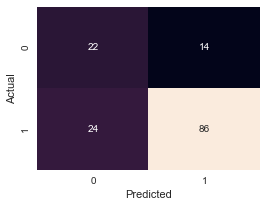

In [65]:
confusion_matrix = pd.crosstab(y_test,ypredictrfc, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False)
plt.show()

In [66]:
rfc_report=classification_report(y_test,ypredictrfc)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.48      0.61      0.54        36
           1       0.86      0.78      0.82       110

    accuracy                           0.74       146
   macro avg       0.67      0.70      0.68       146
weighted avg       0.77      0.74      0.75       146



In [67]:
rfc_met,rfc_test_accu,rfc_test_precision,rfc_test_recall,rfc_test_f1 = performance_matrices(rfc, X_test, y_test, ypredictrfc)
print ('Random_Forest_test_accu ',rfc_test_accu)
print ('Random_Forest_test_precision ',rfc_test_precision)
print ('Random_Forest_test_recall ',rfc_test_recall)
print ('Random_Forest_test_f1 ',rfc_test_f1)

Random_Forest_test_accu  0.74
Random_Forest_test_precision  0.86
Random_Forest_test_recall  0.78
Random_Forest_test_f1  0.82


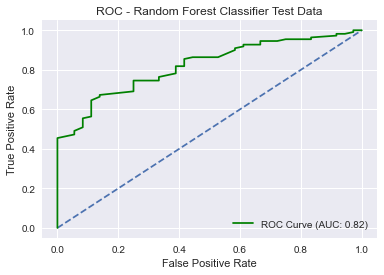

Random_Forest_test_auc 0.82


In [68]:
rfc_test_auc, rfc_test_fpr, rfc_test_tpr = draw_auc_roc(rfc, X_test, y_test, 'green', 'ROC - Random Forest Classifier Test Data')
print('Random_Forest_test_auc', round(rfc_test_auc,2))

feature_rank = pd.DataFrame({'Feature' : numerical_features,'Importance' : rfc.feature_importances_})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,12))
sns.barplot(y='Feature', x='Importance', data=feature_rank, palette = 'nipy_spectral')
plt.title('Feature Ranking - Lite GB', fontsize = 12)

# Naive Bayers

In [69]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train_smote,y_train_smote)


GaussianNB()

In [70]:
ypredictnb=nb.predict(X_test)

In [71]:
accuracy_score(y_test,ypredictnb)

0.636986301369863

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictnb)

array([[34,  2],
       [51, 59]], dtype=int64)

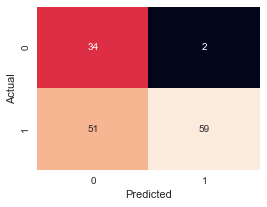

In [73]:
confusion_matrix = pd.crosstab(y_test,ypredictnb, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False)
plt.show()

In [74]:
nb_report=classification_report(y_test,ypredictnb)
print(nb_report)

              precision    recall  f1-score   support

           0       0.40      0.94      0.56        36
           1       0.97      0.54      0.69       110

    accuracy                           0.64       146
   macro avg       0.68      0.74      0.63       146
weighted avg       0.83      0.64      0.66       146



In [75]:
nb_met,nb_test_accu,nb_test_precision,nb_test_recall,nb_test_f1 = performance_matrices(nb, X_test, y_test, ypredictnb)
print ('Naive_Bayers_test_accu ',nb_test_accu)
print ('Naive_Bayers_test_precision ',nb_test_precision)
print ('Naive_Bayers_test_recall ',nb_test_recall)
print ('Naive_Bayers_test_f1 ',nb_test_f1)

Naive_Bayers_test_accu  0.64
Naive_Bayers_test_precision  0.97
Naive_Bayers_test_recall  0.54
Naive_Bayers_test_f1  0.69


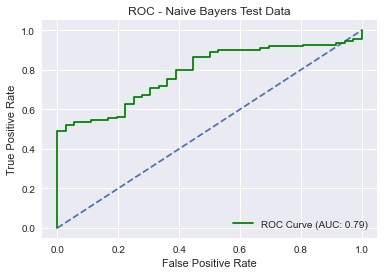

Naive_Bayers_test_auc 0.79


In [76]:
nb_test_auc, nb_test_fpr, nb_test_tpr = draw_auc_roc(nb, X_test, y_test, 'green', 'ROC - Naive Bayers Test Data')
print('Naive_Bayers_test_auc', round(nb_test_auc,2))

# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_smote,y_train_smote)


KNeighborsClassifier()

In [78]:
ypredictknn = knn.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypredictknn)

0.678082191780822

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictknn)

array([[26, 10],
       [37, 73]], dtype=int64)

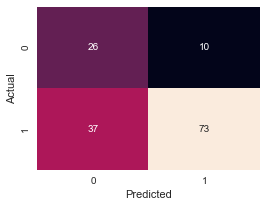

In [81]:
confusion_matrix = pd.crosstab(y_test,ypredictknn, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False)
plt.show()

In [82]:
knn_report=classification_report(y_test,ypredictknn)
print(knn_report)

              precision    recall  f1-score   support

           0       0.41      0.72      0.53        36
           1       0.88      0.66      0.76       110

    accuracy                           0.68       146
   macro avg       0.65      0.69      0.64       146
weighted avg       0.76      0.68      0.70       146



In [83]:
knn_met,knn_test_accu,knn_test_precision,knn_test_recall,knn_test_f1 = performance_matrices(knn, X_test, y_test, ypredictknn)
print ('KNN_test_accu ',knn_test_accu)
print ('KNN_precision ',knn_test_precision)
print ('KNN_test_recall ',knn_test_recall)
print ('KNN_test_f1 ',knn_test_f1)

KNN_test_accu  0.68
KNN_precision  0.88
KNN_test_recall  0.66
KNN_test_f1  0.76


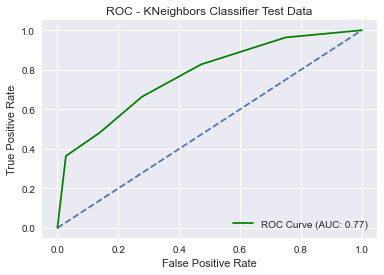

KNN_test_auc 0.77


In [84]:
knn_test_auc, knn_test_fpr, knn_test_tpr = draw_auc_roc(knn, X_test, y_test, 'green', 'ROC - KNeighbors Classifier Test Data')
print('KNN_test_auc', round(knn_test_auc,2))

# MLP

In [85]:
from sklearn.neural_network import MLPClassifier
mlp =MLPClassifier(
    random_state = 7,
    hidden_layer_sizes=(30,20,10),
    max_iter=250
                    )
mlp.fit(X_train_smote,y_train_smote)

MLPClassifier(hidden_layer_sizes=(30, 20, 10), max_iter=250, random_state=7)

In [86]:
ypredictmlp=mlp.predict(X_test)

In [87]:
accuracy_score(y_test,ypredictmlp)

0.6712328767123288

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictmlp)

array([[24, 12],
       [36, 74]], dtype=int64)

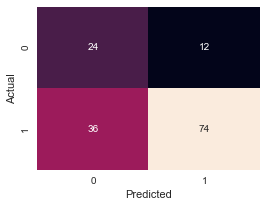

In [89]:
confusion_matrix = pd.crosstab(y_test,ypredictmlp, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False)
plt.show()

In [90]:
mlp_report=classification_report(y_test,ypredictmlp)
print(mlp_report)

              precision    recall  f1-score   support

           0       0.40      0.67      0.50        36
           1       0.86      0.67      0.76       110

    accuracy                           0.67       146
   macro avg       0.63      0.67      0.63       146
weighted avg       0.75      0.67      0.69       146



In [91]:
mlp_met,mlp_test_accu,mlp_test_precision,mlp_test_recall,mlp_test_f1 = performance_matrices(mlp, X_test, y_test, ypredictmlp)
print ('MLP_test_accu ',mlp_test_accu)
print ('MLP_precision ',mlp_test_precision)
print ('MLP_test_recall ',mlp_test_recall)
print ('MLP_test_f1 ',mlp_test_f1)

MLP_test_accu  0.67
MLP_precision  0.86
MLP_test_recall  0.67
MLP_test_f1  0.76


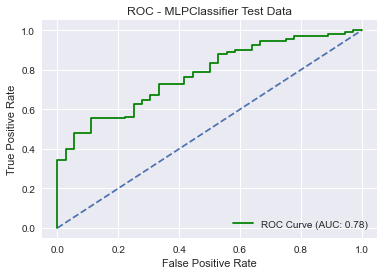

MLP_test_auc 0.78


In [92]:
mlp_test_auc, mlp_test_fpr, mlp_test_tpr = draw_auc_roc(mlp, X_test, y_test, 'green', 'ROC - MLPClassifier Test Data')
print('MLP_test_auc', round(mlp_test_auc,2))

# XGB Classifier

In [93]:
from xgboost import XGBClassifier

In [94]:
xgb = XGBClassifier(
                 gamma=0.03,
                 max_depth=6,
                 learning_rate=0.8
)
xgb.fit(X_train_smote,y_train_smote)
ypredictxgb= xgb.predict(X_test)

[10:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [95]:
accuracy_score(y_test,ypredictxgb)

0.7191780821917808

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictxgb)

array([[20, 16],
       [25, 85]], dtype=int64)

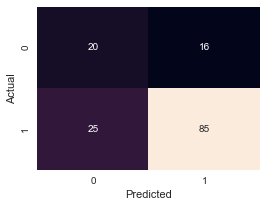

In [97]:
confusion_matrix = pd.crosstab(y_test,ypredictxgb, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False)
plt.show()

In [98]:
xgb_report=classification_report(y_test,ypredictxgb)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.44      0.56      0.49        36
           1       0.84      0.77      0.81       110

    accuracy                           0.72       146
   macro avg       0.64      0.66      0.65       146
weighted avg       0.74      0.72      0.73       146



In [99]:
xgb_met,xgb_test_accu,xgb_test_precision,xgb_test_recall,xgb_test_f1 = performance_matrices(xgb, X_test, y_test, ypredictxgb)
print ('XGB_test_accu ',xgb_test_accu)
print ('XGB_precision ',xgb_test_precision)
print ('XGB_test_recall ',xgb_test_recall)
print ('XGB_test_f1 ',xgb_test_f1)

XGB_test_accu  0.72
XGB_precision  0.84
XGB_test_recall  0.77
XGB_test_f1  0.81


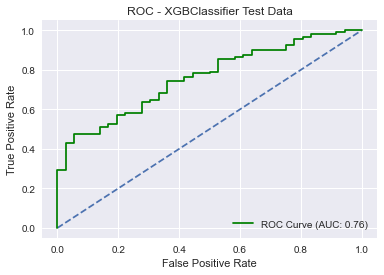

XGB_test_auc 0.76


In [100]:
xgb_test_auc, xgb_test_fpr, xgb_test_tpr = draw_auc_roc(xgb, X_test, y_test, 'green', 'ROC - XGBClassifier Test Data')
print('XGB_test_auc', round(xgb_test_auc,2))

Text(0.5, 1.0, 'Feature Ranking - XG Boost')

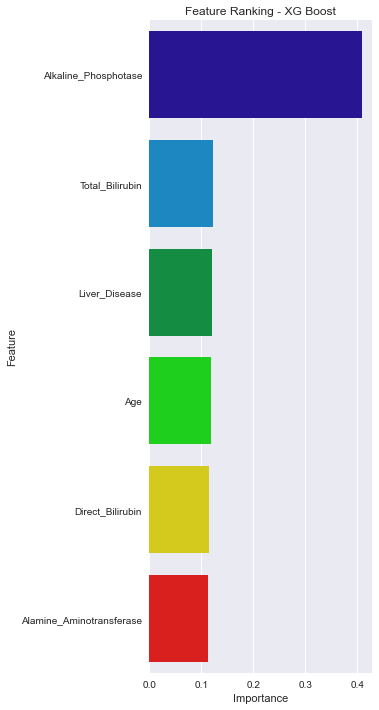

In [101]:
feature_rank = pd.DataFrame({'Feature' : features,'Importance' : xgb.feature_importances_})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,12))
sns.barplot(y='Feature', x='Importance', data=feature_rank, palette = 'nipy_spectral')
plt.title('Feature Ranking - XG Boost', fontsize = 12)

# SVC

In [102]:
from sklearn.svm import SVC

svc=SVC(C=10,gamma=1.0,kernel='rbf', max_iter=500, class_weight = {0: 1, 1: 2})# c is 0.1 to 1000 and gamma 0.01 to 10

svc.fit(X_train_smote,y_train_smote)


SVC(C=10, class_weight={0: 1, 1: 2}, gamma=1.0, max_iter=500)

In [103]:
ypredictsvc = svc.predict(X_test)

In [104]:

accuracy_score(y_test,ypredictsvc)

0.7123287671232876

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictsvc)

array([[21, 15],
       [27, 83]], dtype=int64)

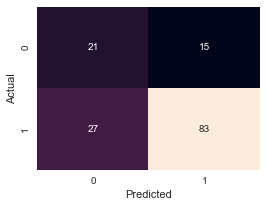

In [106]:
confusion_matrix = pd.crosstab(y_test,ypredictsvc, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False)
plt.show()

In [107]:
svc_report=classification_report(y_test,ypredictsvc)
print(svc_report)

              precision    recall  f1-score   support

           0       0.44      0.58      0.50        36
           1       0.85      0.75      0.80       110

    accuracy                           0.71       146
   macro avg       0.64      0.67      0.65       146
weighted avg       0.75      0.71      0.72       146



In [108]:
svc_met,svc_test_accu,svc_test_precision,svc_test_recall,svc_test_f1 = performance_matrices(svc, X_test, y_test, ypredictsvc)
print ('SVC_test_accu ',svc_test_accu)
print ('SVC_precision ',svc_test_precision)
print ('SVC_test_recall ',svc_test_recall)
print ('SVC_test_f1 ',svc_test_f1)

SVC_test_accu  0.71
SVC_precision  0.85
SVC_test_recall  0.75
SVC_test_f1  0.8


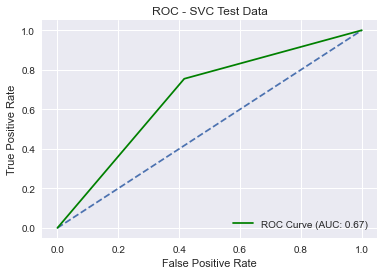

SVC_test_auc 0.67


In [109]:
svc_test_auc, svc_test_fpr, svc_test_tpr = draw_auc_roc_1(svc, X_test, y_test, 'green', 'ROC - SVC Test Data')
print('SVC_test_auc', round(svc_test_auc,2))

# Gradient Boosting Classifier

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
gbc = GradientBoostingClassifier(
    loss='deviance',
    criterion='mse',
    learning_rate=0.25,
    n_estimators=200,
    subsample=0.50,
    max_features='sqrt',
    max_depth=16,
    verbose=0
)

In [112]:
gbc.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(criterion='mse', learning_rate=0.25, max_depth=16,
                           max_features='sqrt', n_estimators=200,
                           subsample=0.5)

In [113]:
ypredictgbc=gbc.predict(X_test)

In [114]:
accuracy_score(y_test,ypredictgbc)

0.7465753424657534

In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictgbc)

array([[25, 11],
       [26, 84]], dtype=int64)

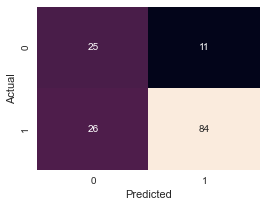

In [116]:
confusion_matrix = pd.crosstab(y_test,ypredictgbc, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False)
plt.show()

In [117]:
gbc_report=classification_report(y_test,ypredictgbc)
print(gbc_report)

              precision    recall  f1-score   support

           0       0.49      0.69      0.57        36
           1       0.88      0.76      0.82       110

    accuracy                           0.75       146
   macro avg       0.69      0.73      0.70       146
weighted avg       0.79      0.75      0.76       146



In [118]:
gbc_met,gbc_test_accu,gbc_test_precision,gbc_test_recall,gbc_test_f1 = performance_matrices(gbc, X_test, y_test, ypredictgbc)
print ('GBC_test_accu ',gbc_test_accu)
print ('GBC_precision ',gbc_test_precision)
print ('GBC_test_recall ',gbc_test_recall)
print ('GBC_test_f1 ',gbc_test_f1)

GBC_test_accu  0.75
GBC_precision  0.88
GBC_test_recall  0.76
GBC_test_f1  0.82


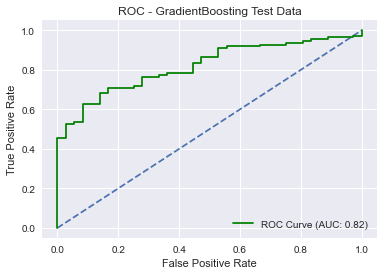

GradientBoosting_test_auc 0.82


In [119]:
gbc_test_auc, gbc_test_fpr, gbc_test_tpr = draw_auc_roc(gbc, X_test, y_test, 'green', 'ROC - GradientBoosting Test Data')
print('GradientBoosting_test_auc', round(gbc_test_auc,2))

# Stochastic Gradient Descent

In [120]:
from sklearn.linear_model import SGDClassifier

In [121]:
sgdc=SGDClassifier(
    loss='squared_hinge',
    alpha=0.25,
    #fit_intercept=False,
    max_iter=200,
    learning_rate='adaptive',
    #power_t=0.50,
    #validation_fraction=0.50,
    #class_weight='balanced',
    eta0=0.50
    
)

In [122]:
sgdc.fit(X_train_smote,y_train_smote)

SGDClassifier(alpha=0.25, eta0=0.5, learning_rate='adaptive',
              loss='squared_hinge', max_iter=200)

In [123]:
ypredictsgdc=sgdc.predict(X_test)

In [124]:
accuracy_score(y_test,ypredictsgdc)

0.6712328767123288

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictsgdc)

array([[31,  5],
       [43, 67]], dtype=int64)

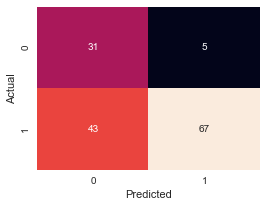

In [126]:
confusion_matrix = pd.crosstab(y_test,ypredictsgdc, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False)
plt.show()

In [127]:
sgdc_report=classification_report(y_test,ypredictsgdc)
print(sgdc_report)

              precision    recall  f1-score   support

           0       0.42      0.86      0.56        36
           1       0.93      0.61      0.74       110

    accuracy                           0.67       146
   macro avg       0.67      0.74      0.65       146
weighted avg       0.80      0.67      0.69       146



In [128]:
sgdc_met,sgdc_test_accu,sgdc_test_precision,sgdc_test_recall,sgdc_test_f1 = performance_matrices(sgdc, X_test, y_test, ypredictsgdc)
print ('SGDC_test_accu ',sgdc_test_accu)
print ('SGDC_precision ',sgdc_test_precision)
print ('SGDC_test_recall ',sgdc_test_recall)
print ('SGDC_test_f1 ',sgdc_test_f1)

SGDC_test_accu  0.67
SGDC_precision  0.93
SGDC_test_recall  0.61
SGDC_test_f1  0.74


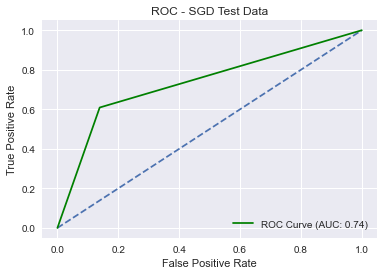

SGD_test_auc 0.74


In [129]:
sgdc_test_auc, sgdc_test_fpr, sgdc_test_tpr = draw_auc_roc_1(sgdc, X_test, y_test, 'green', 'ROC - SGD Test Data')
print('SGD_test_auc', round(sgdc_test_auc,2))

# LGBMClassifier

In [130]:
#pip install lightgbm

In [131]:
from lightgbm import LGBMClassifier

In [132]:
lgbm=LGBMClassifier(
    boosting_type='gbdt',
    max_depth=16,
    learning_rate=0.25,
    num_leaves=64
)

In [133]:
lgbm.fit(X_train_smote,y_train_smote)

LGBMClassifier(learning_rate=0.25, max_depth=16, num_leaves=64)

In [134]:
ypredictlgbm=lgbm.predict(X_test)

In [135]:
accuracy_score(y_test,ypredictlgbm)

0.7534246575342466

In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictlgbm)

array([[23, 13],
       [23, 87]], dtype=int64)

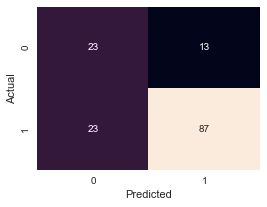

In [137]:
confusion_matrix = pd.crosstab(y_test,ypredictlgbm, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False)
plt.show()

In [138]:
lgbm_report=classification_report(y_test,ypredictlgbm)
print(lgbm_report)

              precision    recall  f1-score   support

           0       0.50      0.64      0.56        36
           1       0.87      0.79      0.83       110

    accuracy                           0.75       146
   macro avg       0.69      0.71      0.69       146
weighted avg       0.78      0.75      0.76       146



In [139]:
lgbm_met,lgbm_test_accu,lgbm_test_precision,lgbm_test_recall,lgbm_test_f1 = performance_matrices(lgbm, X_test, y_test, ypredictlgbm)
print ('LGBM_test_accu ',lgbm_test_accu)
print ('LGBM_precision ',lgbm_test_precision)
print ('LGBM_test_recall ',lgbm_test_recall)
print ('LGBM_test_f1 ',lgbm_test_f1)

LGBM_test_accu  0.75
LGBM_precision  0.87
LGBM_test_recall  0.79
LGBM_test_f1  0.83


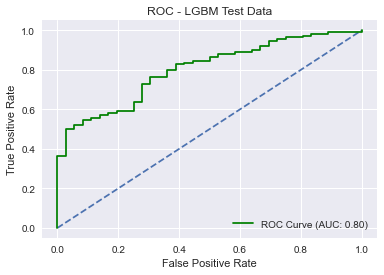

LGBM_test_auc 0.8


In [140]:
lgbm_test_auc, lgbm_test_fpr, lgbm_test_tpr = draw_auc_roc(lgbm, X_test, y_test, 'green', 'ROC - LGBM Test Data')
print('LGBM_test_auc', round(lgbm_test_auc,2))

In [141]:
lgbm.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

Text(0.5, 1.0, 'Feature Ranking - Lite GB')

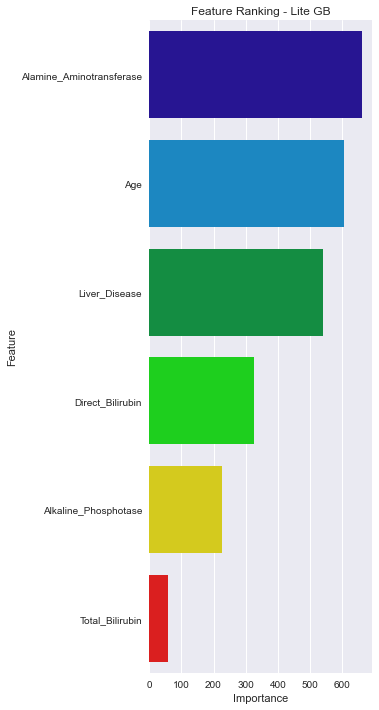

In [142]:
feature_rank = pd.DataFrame({'Feature' : features,'Importance' : lgbm.feature_importances_})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,12))
sns.barplot(y='Feature', x='Importance', data=feature_rank, palette = 'nipy_spectral')
plt.title('Feature Ranking - Lite GB', fontsize = 12)

# Cat Boost

In [143]:
#pip install catboost

In [144]:
from catboost import CatBoostClassifier

In [145]:
cb=CatBoostClassifier()
cb.fit(X_train_smote,y_train_smote)

Learning rate set to 0.008354
0:	learn: 0.6902033	total: 136ms	remaining: 2m 15s
1:	learn: 0.6872012	total: 141ms	remaining: 1m 10s
2:	learn: 0.6843866	total: 147ms	remaining: 48.8s
3:	learn: 0.6816179	total: 152ms	remaining: 38s
4:	learn: 0.6784949	total: 158ms	remaining: 31.4s
5:	learn: 0.6758272	total: 163ms	remaining: 27.1s
6:	learn: 0.6730468	total: 169ms	remaining: 24s
7:	learn: 0.6705459	total: 175ms	remaining: 21.7s
8:	learn: 0.6685220	total: 181ms	remaining: 20s
9:	learn: 0.6662139	total: 187ms	remaining: 18.5s
10:	learn: 0.6636182	total: 193ms	remaining: 17.4s
11:	learn: 0.6616464	total: 199ms	remaining: 16.4s
12:	learn: 0.6593810	total: 204ms	remaining: 15.5s
13:	learn: 0.6571716	total: 211ms	remaining: 14.9s
14:	learn: 0.6549479	total: 217ms	remaining: 14.3s
15:	learn: 0.6528143	total: 223ms	remaining: 13.7s
16:	learn: 0.6502348	total: 228ms	remaining: 13.2s
17:	learn: 0.6480902	total: 234ms	remaining: 12.8s
18:	learn: 0.6463276	total: 241ms	remaining: 12.4s
19:	learn: 0.64

184:	learn: 0.4787715	total: 1.16s	remaining: 5.1s
185:	learn: 0.4782002	total: 1.16s	remaining: 5.1s
186:	learn: 0.4774777	total: 1.17s	remaining: 5.09s
187:	learn: 0.4770202	total: 1.18s	remaining: 5.08s
188:	learn: 0.4764124	total: 1.18s	remaining: 5.07s
189:	learn: 0.4759991	total: 1.19s	remaining: 5.06s
190:	learn: 0.4754378	total: 1.19s	remaining: 5.06s
191:	learn: 0.4748854	total: 1.2s	remaining: 5.05s
192:	learn: 0.4743593	total: 1.2s	remaining: 5.04s
193:	learn: 0.4737905	total: 1.21s	remaining: 5.03s
194:	learn: 0.4732807	total: 1.22s	remaining: 5.02s
195:	learn: 0.4727712	total: 1.22s	remaining: 5.02s
196:	learn: 0.4722600	total: 1.23s	remaining: 5.01s
197:	learn: 0.4718136	total: 1.23s	remaining: 5s
198:	learn: 0.4712000	total: 1.24s	remaining: 4.99s
199:	learn: 0.4709063	total: 1.25s	remaining: 4.98s
200:	learn: 0.4705638	total: 1.25s	remaining: 4.97s
201:	learn: 0.4701073	total: 1.26s	remaining: 4.96s
202:	learn: 0.4696377	total: 1.26s	remaining: 4.95s
203:	learn: 0.46940

363:	learn: 0.4067732	total: 2.13s	remaining: 3.72s
364:	learn: 0.4065199	total: 2.13s	remaining: 3.71s
365:	learn: 0.4061470	total: 2.14s	remaining: 3.71s
366:	learn: 0.4057080	total: 2.15s	remaining: 3.7s
367:	learn: 0.4053894	total: 2.15s	remaining: 3.69s
368:	learn: 0.4049568	total: 2.16s	remaining: 3.69s
369:	learn: 0.4045436	total: 2.16s	remaining: 3.68s
370:	learn: 0.4040585	total: 2.17s	remaining: 3.67s
371:	learn: 0.4035214	total: 2.17s	remaining: 3.67s
372:	learn: 0.4031565	total: 2.18s	remaining: 3.66s
373:	learn: 0.4029173	total: 2.18s	remaining: 3.65s
374:	learn: 0.4026792	total: 2.19s	remaining: 3.65s
375:	learn: 0.4022616	total: 2.19s	remaining: 3.64s
376:	learn: 0.4019695	total: 2.2s	remaining: 3.64s
377:	learn: 0.4016947	total: 2.21s	remaining: 3.63s
378:	learn: 0.4015256	total: 2.21s	remaining: 3.62s
379:	learn: 0.4012264	total: 2.21s	remaining: 3.62s
380:	learn: 0.4008341	total: 2.22s	remaining: 3.61s
381:	learn: 0.4002003	total: 2.23s	remaining: 3.6s
382:	learn: 0.3

548:	learn: 0.3522387	total: 3.1s	remaining: 2.54s
549:	learn: 0.3519340	total: 3.1s	remaining: 2.54s
550:	learn: 0.3517954	total: 3.11s	remaining: 2.53s
551:	learn: 0.3515419	total: 3.11s	remaining: 2.53s
552:	learn: 0.3512920	total: 3.12s	remaining: 2.52s
553:	learn: 0.3511281	total: 3.12s	remaining: 2.51s
554:	learn: 0.3507964	total: 3.13s	remaining: 2.51s
555:	learn: 0.3503970	total: 3.13s	remaining: 2.5s
556:	learn: 0.3502206	total: 3.14s	remaining: 2.5s
557:	learn: 0.3499860	total: 3.15s	remaining: 2.49s
558:	learn: 0.3498137	total: 3.15s	remaining: 2.49s
559:	learn: 0.3496080	total: 3.16s	remaining: 2.48s
560:	learn: 0.3494739	total: 3.16s	remaining: 2.48s
561:	learn: 0.3491375	total: 3.17s	remaining: 2.47s
562:	learn: 0.3488452	total: 3.17s	remaining: 2.46s
563:	learn: 0.3485506	total: 3.18s	remaining: 2.46s
564:	learn: 0.3483573	total: 3.19s	remaining: 2.45s
565:	learn: 0.3481158	total: 3.19s	remaining: 2.45s
566:	learn: 0.3479079	total: 3.19s	remaining: 2.44s
567:	learn: 0.34

732:	learn: 0.3123012	total: 4.07s	remaining: 1.48s
733:	learn: 0.3121193	total: 4.07s	remaining: 1.48s
734:	learn: 0.3117739	total: 4.08s	remaining: 1.47s
735:	learn: 0.3116254	total: 4.08s	remaining: 1.47s
736:	learn: 0.3112932	total: 4.09s	remaining: 1.46s
737:	learn: 0.3110904	total: 4.1s	remaining: 1.45s
738:	learn: 0.3108778	total: 4.1s	remaining: 1.45s
739:	learn: 0.3106668	total: 4.11s	remaining: 1.44s
740:	learn: 0.3103107	total: 4.11s	remaining: 1.44s
741:	learn: 0.3100182	total: 4.12s	remaining: 1.43s
742:	learn: 0.3096849	total: 4.12s	remaining: 1.43s
743:	learn: 0.3096139	total: 4.13s	remaining: 1.42s
744:	learn: 0.3094229	total: 4.14s	remaining: 1.42s
745:	learn: 0.3090498	total: 4.14s	remaining: 1.41s
746:	learn: 0.3089214	total: 4.15s	remaining: 1.4s
747:	learn: 0.3087078	total: 4.15s	remaining: 1.4s
748:	learn: 0.3083509	total: 4.16s	remaining: 1.39s
749:	learn: 0.3080363	total: 4.16s	remaining: 1.39s
750:	learn: 0.3077585	total: 4.17s	remaining: 1.38s
751:	learn: 0.30

918:	learn: 0.2752090	total: 5.04s	remaining: 445ms
919:	learn: 0.2750552	total: 5.05s	remaining: 439ms
920:	learn: 0.2747546	total: 5.05s	remaining: 434ms
921:	learn: 0.2745378	total: 5.06s	remaining: 428ms
922:	learn: 0.2743694	total: 5.07s	remaining: 423ms
923:	learn: 0.2742542	total: 5.07s	remaining: 417ms
924:	learn: 0.2739737	total: 5.08s	remaining: 412ms
925:	learn: 0.2738086	total: 5.09s	remaining: 406ms
926:	learn: 0.2736648	total: 5.09s	remaining: 401ms
927:	learn: 0.2736100	total: 5.1s	remaining: 396ms
928:	learn: 0.2734230	total: 5.1s	remaining: 390ms
929:	learn: 0.2732740	total: 5.11s	remaining: 385ms
930:	learn: 0.2731892	total: 5.12s	remaining: 379ms
931:	learn: 0.2730840	total: 5.12s	remaining: 374ms
932:	learn: 0.2728938	total: 5.13s	remaining: 368ms
933:	learn: 0.2726470	total: 5.13s	remaining: 363ms
934:	learn: 0.2724831	total: 5.14s	remaining: 357ms
935:	learn: 0.2722561	total: 5.14s	remaining: 352ms
936:	learn: 0.2720791	total: 5.15s	remaining: 346ms
937:	learn: 0.

In [146]:
ypredictcb=cb.predict(X_test)

In [147]:
accuracy_score(y_test,ypredictcb)

0.7191780821917808

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredictcb)

array([[23, 13],
       [28, 82]], dtype=int64)

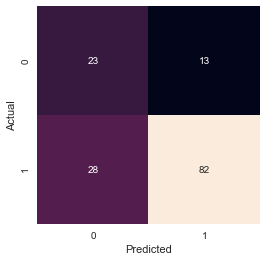

In [149]:
confusion_matrix = pd.crosstab(y_test,ypredictcb, rownames=['Actual'], colnames=['Predicted'])
plt.subplots(figsize=(4,4))
ax=sns.heatmap(confusion_matrix, annot=True, cbar = False)
plt.show()

In [150]:
cb_report=classification_report(y_test,ypredictcb)
print(cb_report)

              precision    recall  f1-score   support

           0       0.45      0.64      0.53        36
           1       0.86      0.75      0.80       110

    accuracy                           0.72       146
   macro avg       0.66      0.69      0.66       146
weighted avg       0.76      0.72      0.73       146



In [151]:
cb_met,cb_test_accu,cb_test_precision,cb_test_recall,cb_test_f1 = performance_matrices(cb, X_test, y_test, ypredictcb)
print ('CatBoost_test_accu ',cb_test_accu)
print ('CatBoost_precision ',cb_test_precision)
print ('CatBoost_test_recall ',cb_test_recall)
print ('CatBoost_test_f1 ',cb_test_f1)

CatBoost_test_accu  0.72
CatBoost_precision  0.86
CatBoost_test_recall  0.75
CatBoost_test_f1  0.8


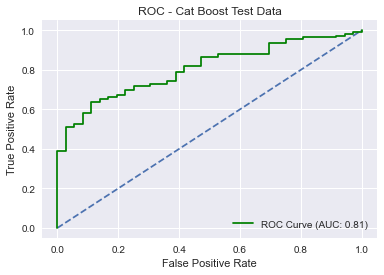

Cat_Boost_test_auc 0.81


In [152]:
cb_test_auc, cb_test_fpr, cb_test_tpr = draw_auc_roc(cb, X_test, y_test, 'green', 'ROC - Cat Boost Test Data')
print('Cat_Boost_test_auc', round(cb_test_auc,2))

Text(0.5, 1.0, 'Feature Ranking - Cat Boost')

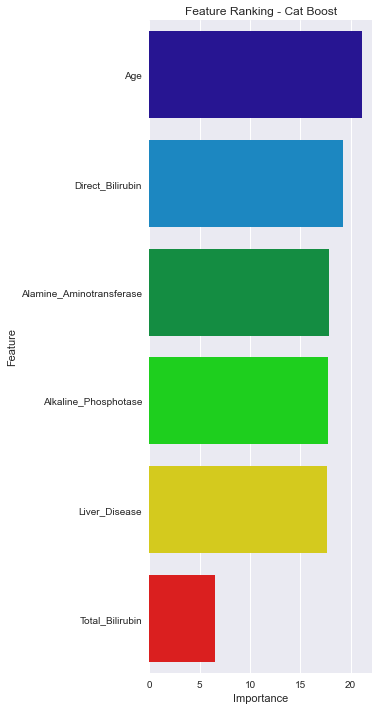

In [153]:
feature_rank = pd.DataFrame({'Feature' : features,'Importance' : cb.feature_importances_})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,12))
sns.barplot(y='Feature', x='Importance', data=feature_rank, palette = 'nipy_spectral')
plt.title('Feature Ranking - Cat Boost', fontsize = 12)

# Final Model Comparison 

In [154]:
index=['Accuracy','AUC','Recall','Precision','F1 Score']
test_perf_data = pd.DataFrame({'Logistic':[lr_test_accu,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
                     'RF':[rfc_test_accu,rfc_test_auc,rfc_test_recall,rfc_test_precision,rfc_test_f1], 
                     'KNN':[knn_test_accu,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
                     'MLP':[mlp_test_accu,mlp_test_auc,mlp_test_recall,mlp_test_precision,mlp_test_f1],
                     'XGB':[xgb_test_accu,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1],
                     'SVC':[svc_test_accu,svc_test_auc,svc_test_recall,svc_test_precision,svc_test_f1],
                     'GBC':[gbc_test_accu,gbc_test_auc,gbc_test_recall,gbc_test_precision,gbc_test_f1],
                     'SGDC':[sgdc_test_accu,sgdc_test_auc,sgdc_test_recall,sgdc_test_precision,sgdc_test_f1],
                     'LGBM':[lgbm_test_accu,lgbm_test_auc,lgbm_test_recall,lgbm_test_precision,lgbm_test_f1],
                     'CB':[cb_test_accu,cb_test_auc,cb_test_recall,cb_test_precision,cb_test_f1],
                     },index=index)
round(test_perf_data,2)

,Logistic,RF,KNN,MLP,XGB,SVC,GBC,SGDC,LGBM,CB
Accuracy,0.71,0.74,0.68,0.67,0.72,0.71,0.75,0.67,0.75,0.72
AUC,0.76,0.82,0.77,0.78,0.76,0.67,0.82,0.74,0.80,0.81
Recall,0.85,0.78,0.66,0.67,0.77,0.75,0.76,0.61,0.79,0.75
Precision,0.78,0.86,0.88,0.86,0.84,0.85,0.88,0.93,0.87,0.86
F1 Score,0.82,0.82,0.76,0.76,0.81,0.80,0.82,0.74,0.83,0.80


# Model Performance

Text(0.5, 1.0, 'Model Performance')

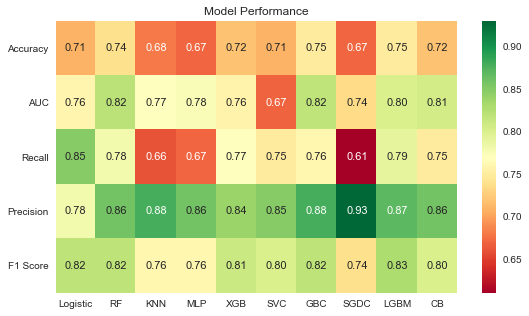

In [155]:
plt.subplots(figsize=(9,5))
ax = sns.heatmap(test_perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":11}, cbar = True)
plt.yticks(rotation=0) 
plt.title('Model Performance')

# Final Model ROC Curve Comparison

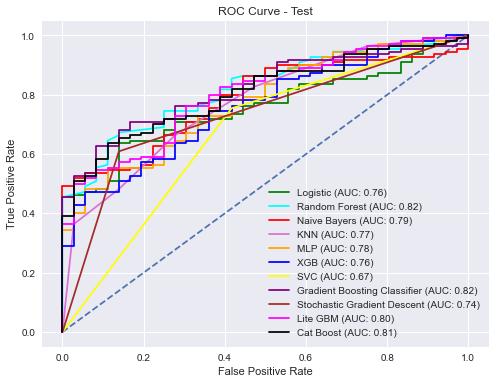

In [156]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='green',label='Logistic (AUC: %0.2f)'%lr_test_auc)
plt.plot(rfc_test_fpr,rfc_test_tpr,color='cyan',label='Random Forest (AUC: %0.2f)'%rfc_test_auc)
plt.plot(nb_test_fpr,nb_test_tpr,color='red',label='Naive Bayers (AUC: %0.2f)'%nb_test_auc)
plt.plot(knn_test_fpr,knn_test_tpr,color='orchid',label='KNN (AUC: %0.2f)'%knn_test_auc)
plt.plot(mlp_test_fpr,mlp_test_tpr,color='orange',label='MLP (AUC: %0.2f)'%mlp_test_auc)
plt.plot(xgb_test_fpr,xgb_test_tpr,color='blue',label='XGB (AUC: %0.2f)'%xgb_test_auc)
plt.plot(svc_test_fpr,svc_test_tpr,color='yellow',label='SVC (AUC: %0.2f)'%svc_test_auc)
plt.plot(gbc_test_fpr,gbc_test_tpr,color='purple',label='Gradient Boosting Classifier (AUC: %0.2f)'%gbc_test_auc)
plt.plot(sgdc_test_fpr,sgdc_test_tpr,color='brown',label='Stochastic Gradient Descent (AUC: %0.2f)'%sgdc_test_auc)
plt.plot(lgbm_test_fpr,lgbm_test_tpr,color='magenta',label='Lite GBM (AUC: %0.2f)'%lgbm_test_auc)
plt.plot(cb_test_fpr,cb_test_tpr,color='black',label='Cat Boost (AUC: %0.2f)'%cb_test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend(loc="lower right")

Conclusion: From the Best model performance we can select Gradient Boosting Classifier,not just for AUC and accuracy score also the performance in precesion, recall and f-1 score it is the best model.

Risk:
1. In this data set the importance is to find liver disease patient but the data has few non-liver patient and high liver disease patient. For health care industry data the target feature should be less that is the liver disease patient should be less.So that the data can be trained better
2. The data isn't enough for production level the data contains 582 rows and 11 features not enought data to train the model well because it is important to find the patient with liver disease from the confusion matrix we found the least number of patient who has liver disease but classified as non-liver patient is 16 which is bad for production level.